In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the dataset
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


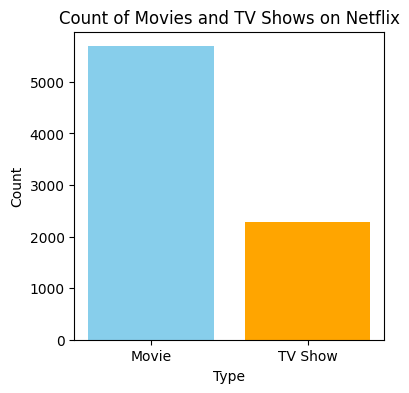

<Figure size 640x480 with 0 Axes>

In [14]:
# clean the data
df = data.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(4, 4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Count of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# save the cleaned data
plt.savefig('netflix_type_counts.png')

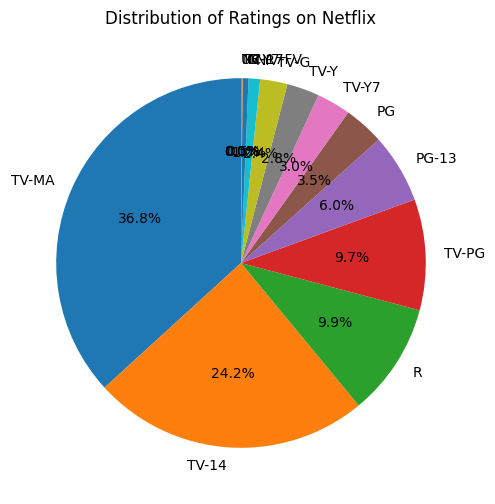

<Figure size 640x480 with 0 Axes>

In [16]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings on Netflix')
plt.show()
# save the pie chart
plt.savefig('netflix_rating_distribution.png')

C:\Users\Shuban Ali - KPT\AppData\Local\Temp\ipykernel_4584\522737124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)


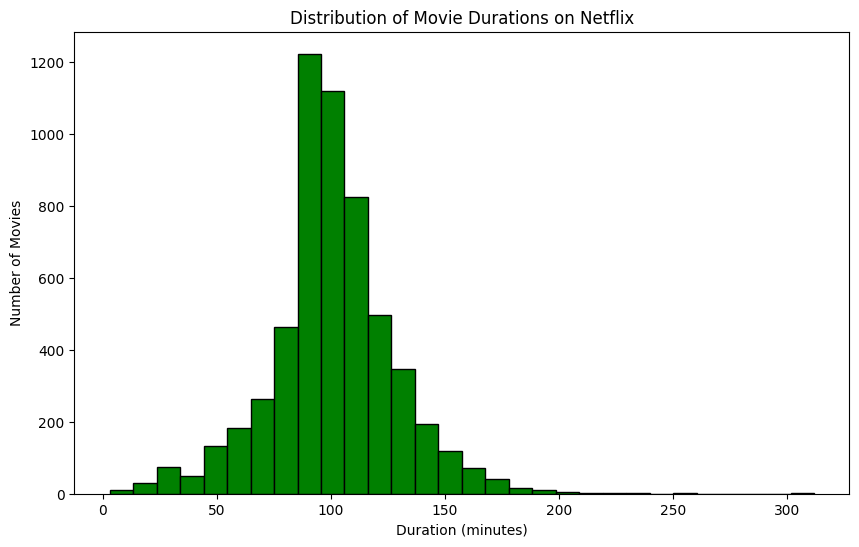

<Figure size 640x480 with 0 Axes>

In [18]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
plt.hist(movie_df['duration'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()
# save the histogram
plt.savefig('netflix_movie_durations.png')

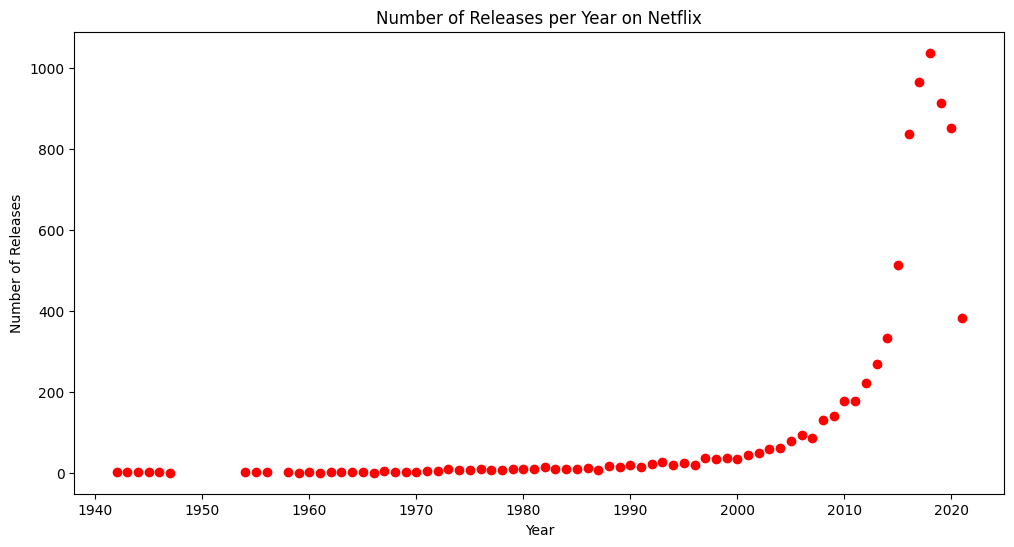

<Figure size 640x480 with 0 Axes>

In [19]:
realease_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.scatter(realease_year_counts.index, realease_year_counts.values, color='red')
plt.title('Number of Releases per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()
# save the scatter plot
plt.savefig('netflix_releases_per_year.png')

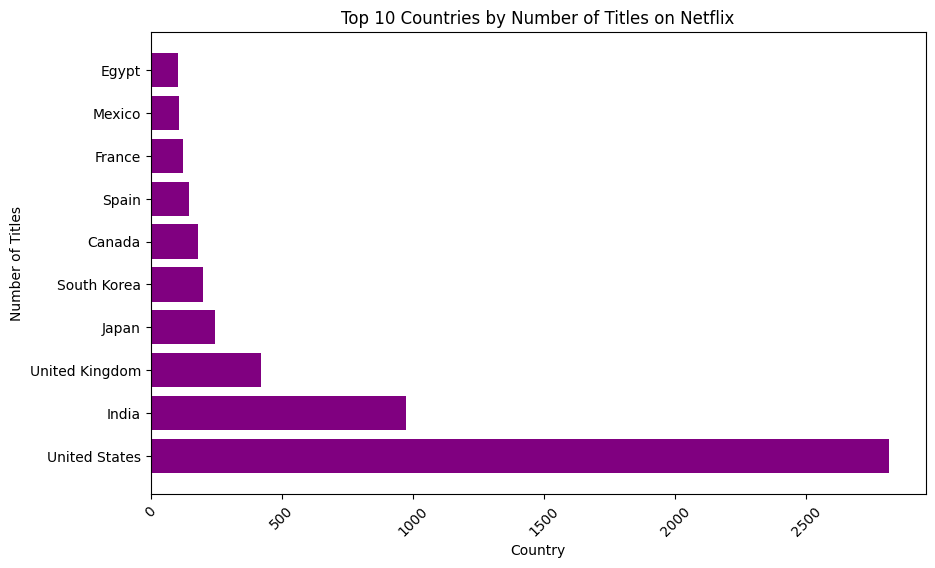

<Figure size 640x480 with 0 Axes>

In [20]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values, color='purple')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
# save the bar chart
plt.savefig('netflix_top_countries.png')

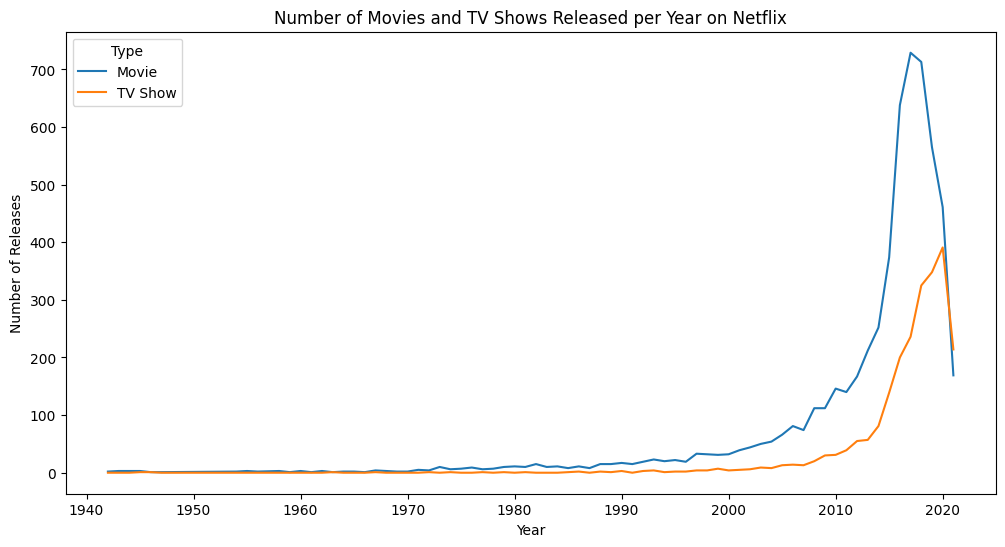

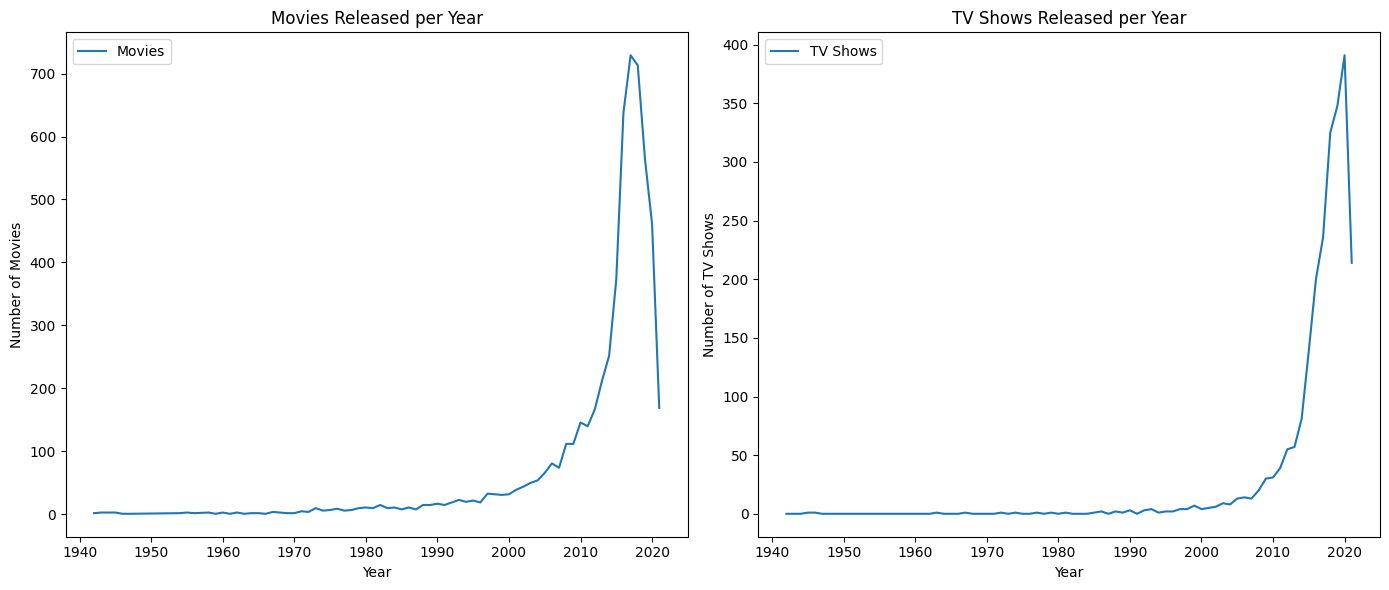

In [23]:
# Grouping and preparing data
content_by_year = df.groupby('release_year')['type'].value_counts().unstack().fillna(0)

# --- FIRST: Combined line plot ---
content_by_year.plot(kind='line', figsize=(12, 6))
plt.title('Number of Movies and TV Shows Released per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend(title='Type')
plt.show()

# --- SECOND: Two Subplots ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Movies subplot
ax[0].plot(content_by_year.index, content_by_year['Movie'], label='Movies')
ax[0].set_title('Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
ax[0].legend()

# TV Shows subplot
ax[1].plot(content_by_year.index, content_by_year['TV Show'], label='TV Shows')
ax[1].set_title('TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].legend()

plt.tight_layout()
plt.show()

# Save the plot
fig.savefig('netflix_releases_by_type_per_year.png')
